<IPython.core.display.Javascript object>


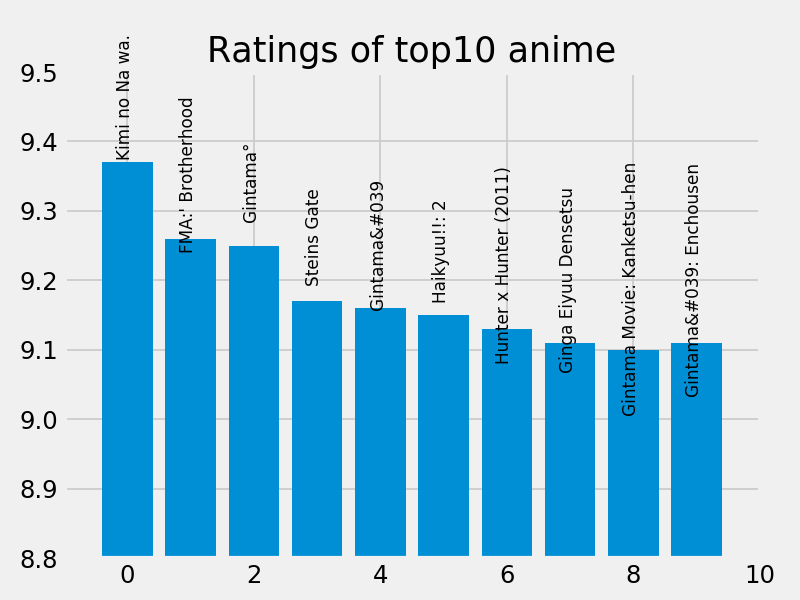

<IPython.core.display.Javascript object>


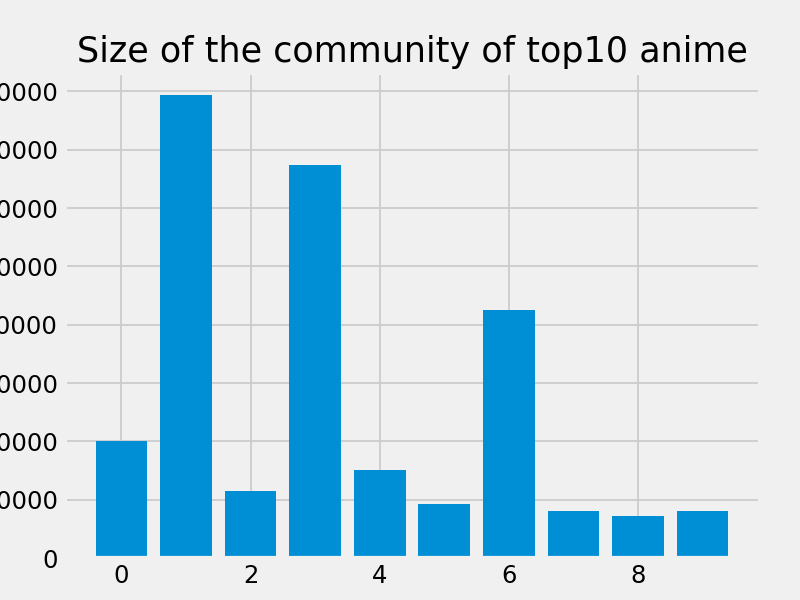

Text(0.5,1,'Size of the community of top10 anime')

In [161]:
#Project using anime database collected from 76K users from myanimelist

#Part 1 : Get the data
%matplotlib ipympl

import os
import cv2
import numpy as np
import csv
import re
import matplotlib.pyplot as plt

data = {}
keys = []

for i in os.listdir():
    x = re.search("csv$",i)
    if ( x != None):
        keys.append(i)
        x = i
        data[x]= []
        gtFile = open(i,encoding="utf-8") # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        gtReader.__next__() # skip header
        for i in gtReader:
            data[x].append(i)
            

#Print only top 10 anime
topten = [data[keys[0]][i][0].split(',') for i in range(10)]

nameOfAnime = [topten[i][1] for i in range(10)]
rating = [float(topten[i][-2]) for i in range(10)]
numberofUsers = [int(topten[i][-1])for i in range(10)]

#Make a graph with the top 10 anime
plt.figure()
plt.style.use('fivethirtyeight')
plt.axis([-1,10,8.8,9.5])
barplot = plt.bar(range(10),rating)

#Add text to each bar
def autolabel(rects):
    for idx,rect in enumerate(barplot):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/1.6, 1.01*height,
                nameOfAnime[idx],
                ha='center', va='bottom',wrap=True, rotation=90,size="x-small")

autolabel(barplot)


plt.title("Ratings of top10 anime")
plt.show()

plt.figure()

plt.bar(range(10),numberofUsers)
plt.show()
plt.title("Size of the community of top10 anime")
    